- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [4]:
data1 = pd.read_csv('Pizza.csv')
data1.head(30)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0      A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1      A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2      A  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3      A  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4      A  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67
5      A  14075  31.14  20.23  42.31  4.92    1.65  1.40  4.67
6      A  14082  31.21  20.97  41.34  4.71    1.58  1.77  4.63
7      A  14097  28.76  21.41  41.60  5.28    1.75  2.95  4.72
8      A  14117  28.22  20.48  45.10  5.02    1.71  1.18  4.93
9      A  14133  27.72  21.19  45.29  5.16    1.66  0.64  4.95
10     A  14101  27.35  21.20  45.59  4.94    1.65  0.92  4.98
11     A  14108  26.98  21.20  45.03  5.15    1.67  1.64  4.97
12     A  14164  28.70  20.00  45.12  4.93    1.56  1.25  4.91
13     A  14154  30.91  19.65  42.45  4.81    1.65  2.81  4.72
14     A  24005  30.91  20.77  42.03  4.90    1.61  1.39  4.67
15     A  24026  30.83  17.88  44.33  5.26    1.76  1.70  4.77
16     A  24094  32.73  20.06  39.74  5.24    1.69  2.23  4.47
17     A  24108  34.58  17.53  40.87  5.05    1.61  1.97  4.46
18     A  24102  31.80  20.35  40.44  5.43    1.61  1.98  4.53
19     A  24082  31.02  19.05  42.29  5.27    1.71  2.37  4.66
20     A  34017  27.02  19.56  47.20  4.95    1.65  1.27  5.08
21     A  34020  27.78  20.01  45.59  4.97    1.70  1.65  4.97
22     A  24136  30.88  20.58  42.26  4.96    1.63  1.32  4.68
23     A  24122  32.20  19.25  43.42  4.62    1.50  0.51  4.70
24     A  24115  33.19  18.05  41.88  5.22    1.70  1.66  4.56
25     A  34012  30.43  19.78  44.20  4.80    1.61  0.79  4.80
26     A  34006  28.93  19.99  45.20  4.78    1.62  1.10  4.91
27     A  24146  30.41  18.71  43.99  4.86    1.62  2.03  4.79
28     A  24138  29.62  21.10  43.37  5.05    1.69  0.86  4.78
29     B  14015  49.57  13.70  29.07  3.62    1.10  4.04  3.33

In [5]:
mat1 = data1.values
print(mat1)
mat1.T

[['A' 14069 27.82 ... 1.77 0.77 4.93]
 ['A' 14053 28.49 ... 1.79 1.02 4.84]
 ['A' 14025 28.35 ... 1.63 0.8 4.95]
 ...
 ['J' 34039 44.55 ... 0.64 25.98 2.92]
 ['J' 14044 47.6 ... 0.56 24.47 2.76]
 ['J' 14045 46.84 ... 0.57 25.48 2.81]]


array([['A', 'A', 'A', ..., 'J', 'J', 'J'],
       [14069, 14053, 14025, ..., 34039, 14044, 14045],
       [27.82, 28.49, 28.35, ..., 44.55, 47.6, 46.84],
       ...,
       [1.77, 1.79, 1.63, ..., 0.64, 0.56, 0.57],
       [0.77, 1.02, 0.8, ..., 25.98, 24.47, 25.48],
       [4.93, 4.84, 4.95, ..., 2.92, 2.76, 2.81]], dtype=object)

### 1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.

In [6]:
mat2 = mat1[:, 3:10]
print(mat2)

[[21.43 44.87 5.11 1.77 0.77 4.93]
 [21.26 43.89 5.34 1.79 1.02 4.84]
 [19.99 45.78 5.08 1.63 0.8 4.95]
 ...
 [11.01 16.03 2.43 0.64 25.98 2.92]
 [10.43 15.18 2.32 0.56 24.47 2.76]
 [9.91 15.5 2.27 0.57 25.48 2.81]]


### 2. Effectuer une ACP de ces données.

In [7]:
sc = StandardScaler()

In [8]:
Z = sc.fit_transform(mat2)

/srv/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


On affiche la matrice des données centrées réduites Z

In [9]:
print(Z)

[[ 1.25418127  2.74984143  1.9538938   2.97668662 -1.22751105  2.68012924]
 [ 1.22771661  2.64047481  2.13533826  3.03077869 -1.21362189  2.53473344]
 [ 1.03000998  2.85139615  1.93022714  2.59804213 -1.22584435  2.71243942]
 ...
 [-0.36794707 -0.46866201 -0.16032853 -0.07951534  0.1730719  -0.56704362]
 [-0.45823828 -0.56352082 -0.24710631 -0.29588362  0.08918137 -0.82552504]
 [-0.53918903 -0.52780927 -0.28655076 -0.26883759  0.14529358 -0.7447496 ]]


On vérifie maintenant que les données sont bien centrées et réduites. C'est ici le cas puisqu'en utilisant la fonction mean on voit bien que la moyenne de chaque colonne est bien de 0 ou extrémement proche de 0. On procède de la même façon pour l'écart type avec la fonction std . L'écart de chaque colonne est de 1 donc les données sont bien centrées et réduites.

In [10]:
print(np.mean(Z,axis=0))

[ 1.89478063e-16 -2.36847579e-16 -5.21064673e-16 -2.36847579e-16
 -4.73695157e-17  1.89478063e-16]


In [11]:
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


On commence l'ACP réellement maintenant.
On calcul tout d'abord le nombre de composantes principales de notre ACP

In [12]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

6


On a donc ici _6_ composantes principales.
Pour savoir quelles composantes principales nous allons retenir pour projeter nos données nous allons calculer les valeurs propres de Z et surtout le ratio de représentation de ces dernières


In [13]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z)
print(eigval)

[4.16017024e+00 1.44442701e+00 2.85090078e-01 8.24761521e-02
 2.76736055e-02 1.62920285e-04]


In [14]:
#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.693361706081826, 0.24073783457342646, 0.047515013035615006, 0.013746025345883118, 0.004612267582400845, 2.715338084871675e-05]


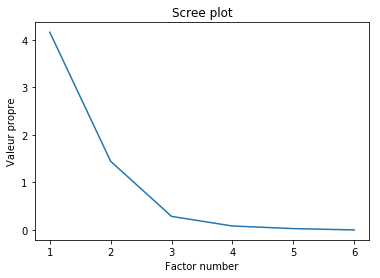

In [15]:
#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Valeur propre")
plt.xlabel("Factor number")
plt.show()

Pour mieux étudier quelles composantes conservées nous tracons le graphique des variances exprimées cumulées en fonction des valeurs propres.

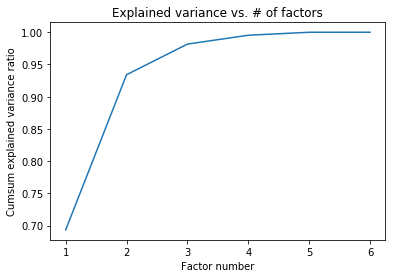

In [16]:
#cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

On voit donc que les deux premières valeurs propres représentent environ 95% de la variance exprimée.
On peut donc conclure qu'on peut se restreindre à n'utiliser que les __2 premières composantes principales__ pour réaliser notre analyse.

In [17]:
bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [18]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.160170  2.450000
1    1.444427  1.450000
2    0.285090  0.950000
3    0.082476  0.616667
4    0.027674  0.366667
5    0.000163  0.166667


On voit bien que les valeurs propres de deux premiers composantes sont supérieurs à 1 donc on ne choisit que 2 premières composantes


On réalise maintenant le __graph des individus__

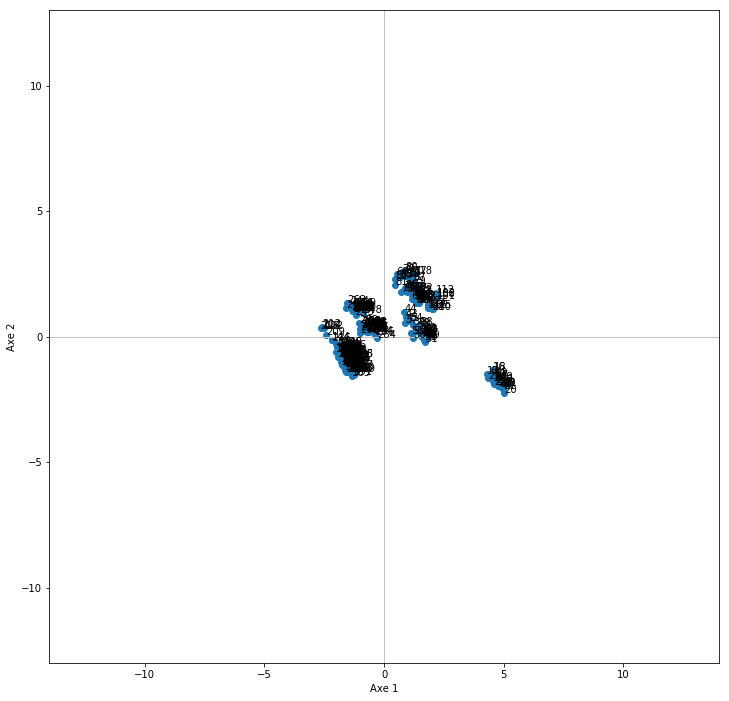

In [19]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-14,14) #même limites en abscisse
axes.set_ylim(-13,13) #et en ordonnée

plt.ylabel("Axe 2")
plt.xlabel("Axe 1")

#ajout des axes pour plus de clarté dans la lecture
plt.plot([-14,14],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-13,13],color='silver',linestyle='-',linewidth=1)

for i in range(300):
    plt.annotate(data1.index[i],(coord[i,0],coord[i,1]))

# placement des points
plt.scatter(coord[:,0],coord[:,1])

On peut aussi dire que alors que nous avons 10 marques de pizza différentes dans notre dataframe il n'y a ici que __2 groupes distincts__ sur ce graph. Cela signifies que les marques sont assez similaires et pour ne pas permettre de séparer les individus sur ce graph.  
On peut également dire que l'axe 1 semble séparer nos deux groupes de points

On finit cette ACP en calculant la contribution des individus à l'inertie totale ou encore la corrélation des variables avec les axes.

In [20]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.37146594  0.45408386  0.46862781  0.44172909 -0.41428579  0.26353668]
 [ 0.44796454 -0.2849707   0.18254012 -0.2663905  -0.41210658 -0.66633538]
 [ 0.67770123 -0.06549862 -0.08417533 -0.47168148  0.25164443  0.49349484]
 [ 0.11239433 -0.52588656  0.53607677  0.38600584  0.52297739 -0.03044151]
 [-0.38538048  0.17088531  0.67275717 -0.60201483  0.01428168  0.08397654]
 [-0.20226536 -0.63446908 -0.00104046  0.00239452 -0.56701077  0.4847986 ]]


In [21]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':data1.index,'d_i':di}))

      ID        d_i
0      0  30.502839
1      1  30.122436
2      2  28.527002
3      3  24.067589
4      4  23.579335
5      5  24.029682
6      6  21.891921
7      7  26.858108
8      8  29.027998
9      9  29.335550
10    10  28.948843
11    11  29.334366
12    12  26.317838
13    13  23.807715
14    14  23.445697
15    15  27.967475
16    16  22.738821
17    17  20.868381
18    18  23.089340
19    19  25.421439
20    20  30.341102
21    21  29.167837
22    22  24.036257
23    23  21.909716
24    24  24.025755
25    25  25.149680
26    26  26.777668
27    27  24.778961
28    28  26.807510
29    29   4.041079
..   ...        ...
270  270   1.365592
271  271   1.299455
272  272   1.235398
273  273   1.663950
274  274   0.716791
275  275   0.843614
276  276   0.678544
277  277   1.298338
278  278   0.742502
279  279   1.412608
280  280   0.964181
281  281   0.833866
282  282   0.778740
283  283   1.228766
284  284   0.223503
285  285   0.996909
286  286   0.669880
287  287   0.786404


In [22]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [23]:
#corrélation des variables avec les axes
corvar = np.zeros((6,6))
for k in range(6):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 7.57660323e-01  5.38383121e-01  3.61850623e-01  3.22781485e-02
  -6.41095290e-02 -2.58171969e-03]
 [ 9.26171932e-01 -3.42490091e-01 -3.49722224e-02 -1.51027582e-01
   2.84274306e-02 -8.09837797e-03]
 [ 9.55836495e-01  2.19384596e-01 -4.49444321e-02  1.53954072e-01
   1.11915750e-01 -1.32804860e-05]
 [ 9.00972532e-01 -3.20159606e-01 -2.51848792e-01  1.10855710e-01
  -1.00147489e-01  3.05637377e-05]
 [-8.44997818e-01 -4.95287481e-01  1.34362593e-01  1.50192106e-01
   2.37581222e-03 -7.23733860e-03]
 [ 5.37522465e-01 -8.00830629e-01  2.63495780e-01 -8.74239475e-03
   1.39698209e-02  6.18798047e-03]]


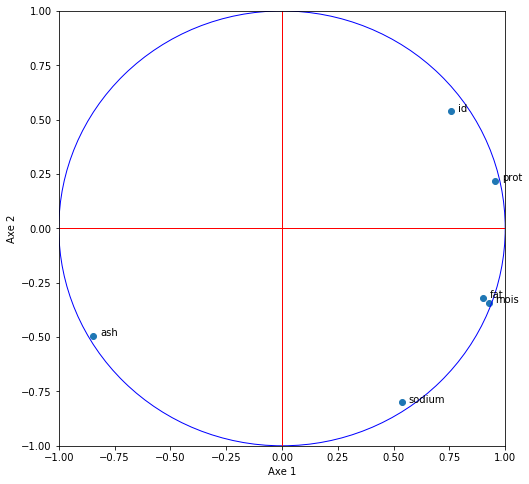

In [24]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(6):
     plt.annotate(data1.columns[j+1],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='red',linestyle='-',linewidth=1)
plt.ylabel("Axe 2")
plt.xlabel("Axe 1")
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

On peut commencer par dire que les variables prot, fat, mois sont __fortement corrélées positivement__ avec le premier axe.  
De ce fait plus les individus du graph des individus sont à droite sur le premier axe plus leur valeurs pour ces variables seront grandes.  
Ensuite on peut dire que la variable ash est de son coté __plutôt corrélées négativement__ avec l'axe 2. 

### 4. Effectuer une CAH pour afficher le dendogramme.

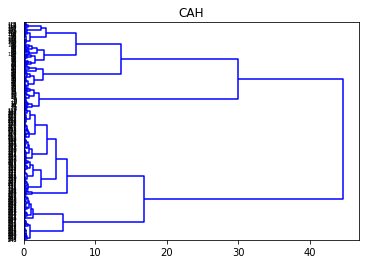

In [25]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z2 = linkage(Z,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z2,orientation='right',color_threshold=0)
plt.show()

Voila la CAH que l'on obtient. Cela n'etant pas très lisible nous allons afficher __10 groupes__ qui devraient en théorie correspondre à nos 10 marques de pizza.

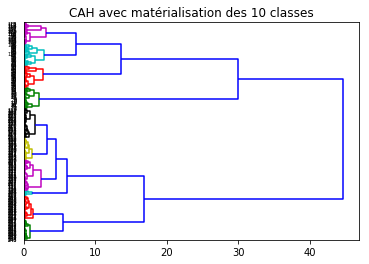

In [26]:
#matérialisation des 10 classes (hauteur t = 3.15)

plt.title('CAH avec matérialisation des 10 classes')
dendrogram(Z2,orientation='right',labels = None ,color_threshold=3.15)
plt.show()

In [27]:
#découpage à la hauteur t = 4 ==> identifiants de 10 groupes obtenus

groupes_cah = fcluster(Z2,t=3.15,criterion='distance')
print(groupes_cah)

[ 7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10  9
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  9  6
  6  6  3  6  3  6  6  6  6  6  6  4  4  4  6  6  4  6  6  4  4  4  4  4
  3  6  6  4  5  5  4  4  5  4  5  5  4  4  5  4  5  4  4  4  5  4  5  5
  5  4  5  4  4  4  4  4  5  5  5  5  5  4  4  4  5  4  4  5  5  5  5  4
  5  5  5  4  5  4  5  5  4  4  5  4  5  4  6  4  6  3  6  6  3  6  6  6
  3  4  6  6  6  6  6  6  6  6  6  4  6  6  6  6  4  6  6  4  3  6  6  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2]


### 5. Comparer avec une méthode K-means.

In [28]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=10)  
kmeans.fit(Z)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(data1.index[idk],kmeans.labels_[idk]))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 4 0 0 0 7 0 7 0 0 0 0 0 0 8 8 8 0 0 8 0 0 8 8 8 8 8 7 0 0 8
 9 9 8 8 9 9 9 9 9 8 9 8 9 8 8 8 9 8 9 9 9 9 9 8 9 8 8 8 9 9 9 9 9 8 9 9 9
 9 9 9 9 9 0 8 9 9 9 8 9 8 9 9 8 8 9 9 9 9 0 8 0 7 0 0 7 0 0 0 7 8 0 0 0 0
 0 0 0 0 0 8 0 0 0 0 8 0 0 8 7 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6]
      0
0   218
0   190
0   146
0   145
0   138
0   137
0   135
0   134
0   130
0   129
0   128
0   127
0   125
0   123
0   121
0   120
0   119
0   219
0   238
0   237
0   126
0   233
0   220
0   234
0   215
0   214
0   221
0   211
0   210
0   222
..  ...
9   202
9   203
9   204
9   205
9   148
9   156
9   193
9   158
9   179
9   178
9   177
9   176
9   183
9   184
9   185
9   172
9   18

Ici chaque individu est affecté à une ckasse (0 à 9) grace à la methode des K-means

In [29]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1   2   3   4   5   6  7   8   9
row_0                                       
1       0   0   0  29   0   0   0  0   0   0
2       0   0   0   0   0   0  32  0   0   0
3       0   0   0   0   0   0   0  7   0   0
4       0   0   0   0   0   0   0  0  33  10
5       1   0   0   0   0   0   0  0   0  29
6      40   0   0   0   0   0   0  0   0   0
7       0   0  29   0   0   0   0  0   0   0
8       0   0   0   0   0  31   0  0   0   0
9       0   0   0   0  29   0   0  0   0   0
10      0  30   0   0   0   0   0  0   0   0

On fait pour finir le tableau de correspondance entre les groupes de la CAH et ceux déterminés par la méthode des K-means. On remarque qu'il y a des groupes qui correspondent réellement l'un à l'autre, il y a également 3 4 groupes qui se distiguent. Cela s'explique surement encore par le fait que sur le graph des individus de l'ACP, une tache de point correspond à certaines marques et donc deux groupes. De ce fait les deux méthodes ne parviennent pas à s'accorder sur comment délimité les groupes.

### 6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe)

On a vérifié sur le 30 premières individus et les 28 premières apartiennent à la marque A, ici on peut voir que les 28 individus appartiennent bien à une seule classe (qu'on peut voir dans le tableau au dessus). On peut dire que la classification est bonne. 

### 7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.

On observe qu'il y a un groupe contenant seulement 7 individus. Cette valeur est extrême par rapport à autre groupe. L'effectif général des groupes est environs trentaine. Donc on peut exclure un groupe puis refaire une ACP pour obtenir une meilleur résultat. 

# Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


In [30]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [31]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(4)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0
2    8  183  64    0   0  23.3  0.672   32         1
3    1   89  66   23  94  28.1  0.167   21         0

In [32]:
datas=data2.values
datas

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [33]:
import tensorflow as tf
# model creation
model = tf.keras.models.Sequential()

In [34]:
# Add the layers
model.add(tf.keras.layers.Dense(6, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

In [35]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)    

Instructions for updating:
Colocations handled automatically by placer.


In [36]:
labels=np.array(data2['RESULTAT'])

On passe maintenant à la phase d'entrainement de notre modèle. On décide de l'entrainer avec 80% des données de __datas__ sur 150 epochs mais on aurait pu choisir d'autres paramètres.

In [29]:
training = model.fit(datas, labels, epochs=150, validation_split=0.2)

Train on 614 samples, validate on 154 samples
Epoch 1/150
614/614 [==============================] - 0s 382us/sample - loss: 5.8200 - acc: 0.6270 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 2/150
614/614 [==============================] - 0s 94us/sample - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 3/150
614/614 [==============================] - 0s 148us/sample - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 4/150
614/614 [==============================] - 0s 140us/sample - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 5/150
614/614 [==============================] - 0s 142us/sample - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 6/150
614/614 [==============================] - 0s 50us/sample - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.6429
Epoch 7/150
614/614 [==============================] - 0s 160us/sample - loss: 5.5915 - acc: 0.6531 - val_loss: 5.7565 - val_acc: 0.64

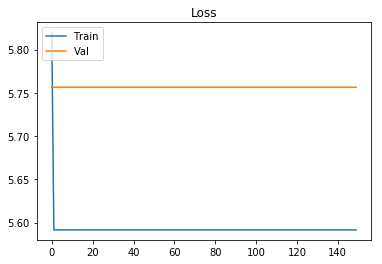

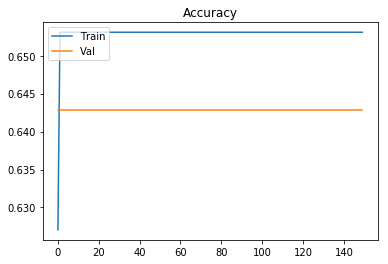

In [30]:
loss_curve = training.history["loss"]
acc_curve = training.history["acc"]

loss_val_curve = training.history["val_loss"]
acc_val_curve = training.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [33]:
labels_test=np.array(data2['RESULTAT'])
labels_test -=1

In [38]:
datas_test=data2.drop(['RESULTAT'], axis='columns', inplace=True)
datas_test=data2.values

KeyError: "['RESULTAT'] not found in axis"

### Utiliser ce modèle et comparer

In [7]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)